In [55]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [56]:
# Mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
path = "/content/gdrive/MyDrive/Dataset/"

In [58]:
# Membuat dataframe dan memanggil file
df = pd.read_csv(path + 'fifa_world_cup_2022_tweets.csv')
df

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [59]:
# Mengecek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [60]:
df.describe()

,Unnamed: 0,Number of Likes
count,22524.000000,22524.000000
mean,11261.500000,23.822856
std,6502.263068,2128.018705
min,0.000000,0.000000
25%,5630.750000,0.000000
50%,11261.500000,0.000000
75%,16892.250000,2.000000
max,22523.000000,316867.000000


In [61]:
# Mencari nilai yang hilang
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64


In [62]:
# Menampilkan data setelah di cleaning
print("Data setelah di cleaning\n")
df_cleaned = df.drop_duplicates().reset_index(drop=True)
print(df_cleaned.head())

Data setelah di cleaning

   Unnamed: 0               Date Created  Number of Likes  \
0           0  2022-11-20 23:59:21+00:00                4   
1           1  2022-11-20 23:59:01+00:00                3   
2           2  2022-11-20 23:58:41+00:00                1   
3           3  2022-11-20 23:58:33+00:00                1   
4           4  2022-11-20 23:58:28+00:00                0   

       Source of Tweet                                              Tweet  \
0      Twitter Web App  What are we drinking today @TucanTribe \n@MadB...   
1   Twitter for iPhone  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2   Twitter for iPhone  Worth reading while watching #WorldCup2022 htt...   
3      Twitter Web App  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  Twitter for Android  If the BBC cares so much about human rights, h...   

  Sentiment  
0   neutral  
1  positive  
2  positive  
3  positive  
4  negative  


In [63]:
# Rename columns to Bahasa Indonesia
df_cleaned.rename(columns={
    'Date Created': 'Tanggal Dibuat',
    'Number of Likes': 'Jumlah Likes',
    'Source of Tweet': 'Sumber Tweet',
    'Tweet': 'Isi Tweet',
    'Sentiment': 'Sentimen'
}, inplace=True)

# Menampilkan DataFrame dengan kolom yang sudah diubah
print("DataFrame dengan Nama Kolom yang Diubah:\n")
print(df_cleaned)  # Menampilkan dataframe

DataFrame dengan Nama Kolom yang Diubah:

       Unnamed: 0             Tanggal Dibuat  Jumlah Likes  \
0               0  2022-11-20 23:59:21+00:00             4   
1               1  2022-11-20 23:59:01+00:00             3   
2               2  2022-11-20 23:58:41+00:00             1   
3               3  2022-11-20 23:58:33+00:00             1   
4               4  2022-11-20 23:58:28+00:00             0   
...           ...                        ...           ...   
22519       22519  2022-11-20 00:00:21+00:00             1   
22520       22520  2022-11-20 00:00:03+00:00             0   
22521       22521  2022-11-20 00:00:01+00:00             2   
22522       22522  2022-11-20 00:00:00+00:00            11   
22523       22523  2022-11-20 00:00:00+00:00            24   

              Sumber Tweet                                          Isi Tweet  \
0          Twitter Web App  What are we drinking today @TucanTribe \n@MadB...   
1       Twitter for iPhone  Amazing @CanadaSoccerEN

In [64]:
# Mencari nilai minimal, maksimal dan rata-rata pada kolom Jumlah Likes
min_likes = df_cleaned['Jumlah Likes'].min()
max_likes = df_cleaned['Jumlah Likes'].max()
mean_likes = df_cleaned['Jumlah Likes'].mean()

print(f"Jumlah Likes:\n- Min: {min_likes}, \n- Max: {max_likes}, \n- Rata-rata: {mean_likes}")

Jumlah Likes:
- Min: 0, 
- Max: 316867, 
- Rata-rata: 23.822855620671284


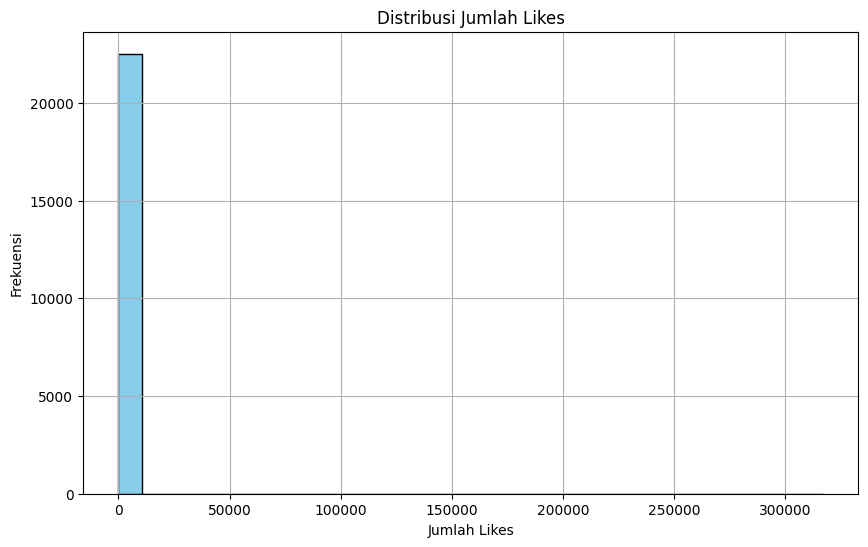

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Jumlah Likes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Likes')
plt.xlabel('Jumlah Likes')
plt.ylabel('Frekuensi')
plt.grid(True)  # Menambahkan grid untuk mempermudah membaca
plt.show()

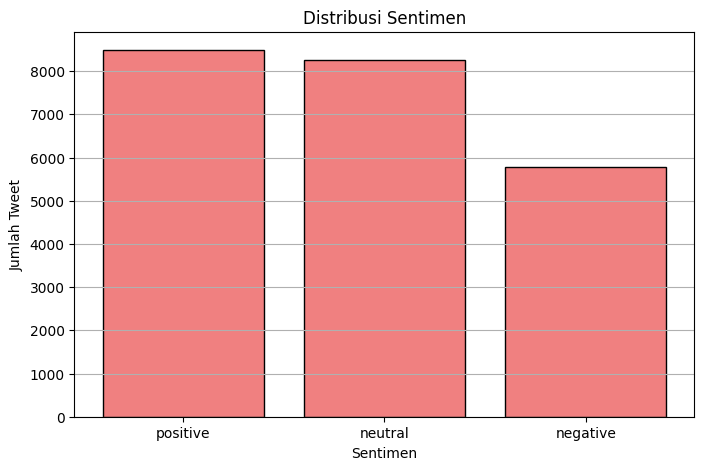

In [66]:
sentiment_counts = df_cleaned['Sentimen'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='lightcoral', edgecolor='black')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.grid(axis='y')  # Grid pada sumbu y untuk referensi nilai
plt.show()

In [67]:
# Normalisasi data

# min-max scaling
scaler_min_max = MinMaxScaler()
df_cleaned['Jumlah Likes Min-Max'] = scaler_min_max.fit_transform(df_cleaned[['Jumlah Likes']])

In [68]:
# z-score scaling
scaler_z = StandardScaler()
df_cleaned['Jumlah Likes Z-Score'] = scaler_z.fit_transform(df_cleaned[['Jumlah Likes']])

In [69]:
# decimal scaling
scaler_decimal = MaxAbsScaler()
df_cleaned['Jumlah Likes Decimal'] = scaler_decimal.fit_transform(df_cleaned[['Jumlah Likes']])

In [70]:
# menampilkan nilai normalisasi
print("\nNormalized Values:")
print(df_cleaned[['Jumlah Likes', 'Jumlah Likes Min-Max', 'Jumlah Likes Z-Score', 'Jumlah Likes Decimal']].head())


Normalized Values:
   Jumlah Likes  Jumlah Likes Min-Max  Jumlah Likes Z-Score  \
0             4              0.000013             -0.009315   
1             3              0.000009             -0.009785   
2             1              0.000003             -0.010725   
3             1              0.000003             -0.010725   
4             0              0.000000             -0.011195   

   Jumlah Likes Decimal  
0              0.000013  
1              0.000009  
2              0.000003  
3              0.000003  
4              0.000000  
